In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
np.__version__

'1.26.1'

In [3]:
pd.__version__

'2.1.1'

In [4]:
sns.__version__

'0.13.2'

資料來源:https://archive.ics.uci.edu/dataset/222/bank+marketing


In [37]:
# 載入資料
import zipfile 
url='../datasets/bank.zip'
zip_file = zipfile.ZipFile(url)
df_raw = pd.read_csv(zip_file.open('bank-full.csv'), sep=';')
zip_file.close()

In [38]:
df=df_raw.copy(deep=True)
df.columns=['年齡','職業','婚姻','學歷','違約','年平均餘額','房屋貸款','個人信貸',
            '聯絡方式','最近一次聯絡星期','最近一次聯絡月份','最近一次聯絡秒數',
            '促銷期間聯絡次數','上次促銷後_經過天數','促銷前聯絡次數',
            '上次促銷結果','是否購買定期存款']

In [39]:
df.head(10)

,年齡,職業,婚姻,學歷,違約,年平均餘額,房屋貸款,個人信貸,聯絡方式,最近一次聯絡星期,最近一次聯絡月份,最近一次聯絡秒數,促銷期間聯絡次數,上次促銷後_經過天數,促銷前聯絡次數,上次促銷結果,是否購買定期存款
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [8]:
# 查看資料狀況
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   年齡          45211 non-null  int64 
 1   職業          45211 non-null  object
 2   婚姻          45211 non-null  object
 3   學歷          45211 non-null  object
 4   違約          45211 non-null  object
 5   年平均餘額       45211 non-null  int64 
 6   房屋貸款        45211 non-null  object
 7   個人信貸        45211 non-null  object
 8   聯絡方式        45211 non-null  object
 9   最近一次聯絡星期    45211 non-null  int64 
 10  最近一次聯絡月份    45211 non-null  object
 11  最近一次聯絡秒數    45211 non-null  int64 
 12  促銷期間聯絡次數    45211 non-null  int64 
 13  上次促銷後_經過天數  45211 non-null  int64 
 14  促銷前聯絡次數     45211 non-null  int64 
 15  上次促銷結果      45211 non-null  object
 16  是否購買定期存款    45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [9]:
# target 比例
(df['是否購買定期存款'].value_counts())/df.shape[0]

是否購買定期存款
no     0.883015
yes    0.116985
Name: count, dtype: float64

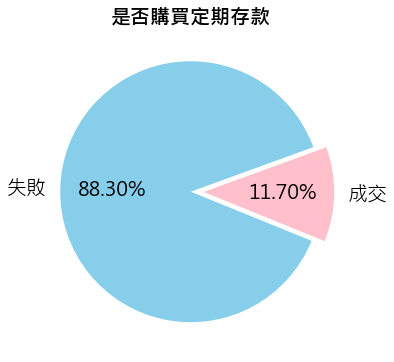

In [10]:
# 繪圖查看
plt.figure(figsize=(6,6))
plt.pie(df['是否購買定期存款'].value_counts(),colors=['skyblue','pink'],autopct='%.2f%%',
     explode=[0,0.1],startangle=20,labels=['失敗','成交'],textprops={'fontsize': 20})
plt.title('是否購買定期存款',fontdict={'fontsize':20,'fontweight':'heavy'})
plt.show()

In [11]:
# 非數值名單
non_numeric=[i for i in df.columns if (df[i].dtype=='object')]
binary_variable=[i for i in non_numeric if len(df[i].unique())==2]
muticlass_variable=[i for i in non_numeric if len(df[i].unique())>2]
print(f'二元分類:{binary_variable}\n多元分類:{muticlass_variable}')

二元分類:['違約', '房屋貸款', '個人信貸', '是否購買定期存款']
多元分類:['職業', '婚姻', '學歷', '聯絡方式', '最近一次聯絡月份', '上次促銷結果']


In [12]:
# 確認變數值
for i in binary_variable:
    print(f'{i}',df[i].unique())

違約 ['no' 'yes']
房屋貸款 ['yes' 'no']
個人信貸 ['no' 'yes']
是否購買定期存款 ['no' 'yes']


In [26]:
# 二元分類變數處裡
for i in binary_variable:
    df[i]=df[i].map({'yes':1,'no':0})
df.head()

,年齡,職業,婚姻,學歷,違約,年平均餘額,房屋貸款,個人信貸,聯絡方式,最近一次聯絡星期,最近一次聯絡月份,最近一次聯絡秒數,促銷期間聯絡次數,上次促銷後_經過天數,促銷前聯絡次數,上次促銷結果,是否購買定期存款
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,0


In [27]:
# 月份轉數字
month_dict={'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,
            'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12}
df['最近一次聯絡月份']=df['最近一次聯絡月份'].map(month_dict)
df.head()

,年齡,職業,婚姻,學歷,違約,年平均餘額,房屋貸款,個人信貸,聯絡方式,最近一次聯絡星期,最近一次聯絡月份,最近一次聯絡秒數,促銷期間聯絡次數,上次促銷後_經過天數,促銷前聯絡次數,上次促銷結果,是否購買定期存款
0,58,management,married,tertiary,0,2143,1,0,unknown,5,5,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,5,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,5,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,5,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,5,198,1,-1,0,unknown,0


In [28]:
# 剩下的欄位直接OneHot
df=pd.get_dummies(df,dtype=int)

In [29]:
df.head()

,年齡,違約,年平均餘額,房屋貸款,個人信貸,最近一次聯絡星期,最近一次聯絡月份,最近一次聯絡秒數,促銷期間聯絡次數,上次促銷後_經過天數,...,學歷_secondary,學歷_tertiary,學歷_unknown,聯絡方式_cellular,聯絡方式_telephone,聯絡方式_unknown,上次促銷結果_failure,上次促銷結果_other,上次促銷結果_success,上次促銷結果_unknown
0,58,0,2143,1,0,5,5,261,1,-1,...,0,1,0,0,0,1,0,0,0,1
1,44,0,29,1,0,5,5,151,1,-1,...,1,0,0,0,0,1,0,0,0,1
2,33,0,2,1,1,5,5,76,1,-1,...,1,0,0,0,0,1,0,0,0,1
3,47,0,1506,1,0,5,5,92,1,-1,...,0,0,1,0,0,1,0,0,0,1
4,33,0,1,0,0,5,5,198,1,-1,...,0,0,1,0,0,1,0,0,0,1


In [30]:
# 分割資料,轉array
Y=df['是否購買定期存款'].values
X=df.drop(['是否購買定期存款'],axis=1).values

In [31]:
# 訓練:測試=6:4
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=1,stratify=Y,test_size=0.4)

In [32]:
# 演算法
# 邏輯斯回歸
from sklearn.linear_model import LogisticRegression
algorithm1=LogisticRegression(random_state=1)

# 決策樹
from sklearn.tree import DecisionTreeClassifier
algorithm2=DecisionTreeClassifier(random_state=1)

# 隨機森林
from sklearn.ensemble import RandomForestClassifier
algorithm3=RandomForestClassifier(random_state=1)

# XGBoost
from xgboost import XGBClassifier
algorithm4=XGBClassifier(random_state=1)

algorithm_list=[algorithm1,algorithm2,algorithm3,algorithm4]

In [34]:
# 使用交叉驗證
# 資料不平均,於是選用auc作為評分標準
from sklearn.model_selection import StratifiedKFold
stratifiled=StratifiedKFold(n_splits=4)
from sklearn.model_selection import cross_val_score

for algorithm in algorithm_list:
    scores=cross_val_score(algorithm,x_train,y_train,cv=stratifiled,scoring='roc_auc')
    print(f'平均分數:{scores.mean():.4f} 個別分數:{scores} {algorithm.__class__.__name__}')

C:\Users\ininl\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ininl\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

平均分數:0.8381 個別分數:[0.84647179 0.83241672 0.83100585 0.84252406] LogisticRegression
平均分數:0.7070 個別分數:[0.70862933 0.69382194 0.7242104  0.70117779] DecisionTreeClassifier
平均分數:0.9248 個別分數:[0.92554256 0.92320651 0.92318938 0.927275  ] RandomForestClassifier
平均分數:0.9283 個別分數:[0.92821034 0.92808118 0.92641588 0.93056236] XGBClassifier


In [35]:
# 選用分數的高XGBoost的繼續開發訓練
algorithm=XGBClassifier(random_state=1)
algorithm.fit(x_train,y_train)
y_pre=algorithm.predict(x_test)

In [36]:
# 顯示混淆矩陣與各項指標
from sklearn.metrics import confusion_matrix
matrix=confusion_matrix(y_test,y_pre)
df_matrix=pd.DataFrame(matrix,index=[['實際分類']*2,['失敗','成功']],columns=[['預測分類']*2,['失敗','成功']])

from sklearn.metrics import precision_recall_fscore_support
precision,recall,fscore,_=precision_recall_fscore_support(y_test,y_pre,average='binary')
print(f'精確性:{precision:.4f}  召回率:{recall:.4f}  F分數:{fscore:.4f}')
print()
df_matrix


精確性:0.6157  召回率:0.4853  F分數:0.5428



預測分類      
            失敗    成功
實際分類 失敗  15328   641
     成功   1089  1027

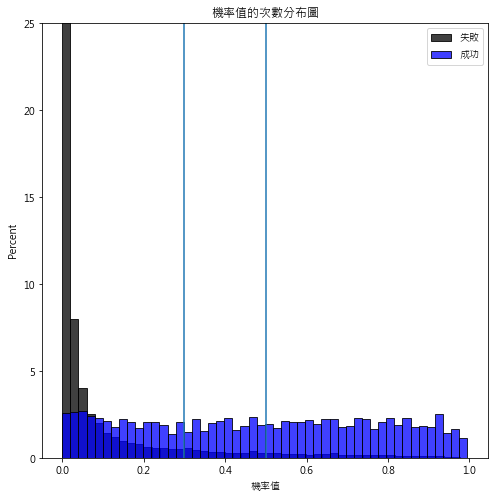

In [24]:
# 降低閾值,提高召回率
# 取得機率值
y_proba1=algorithm.predict_proba(x_test)[:,1]

# 將target 區分開
y0=y_proba1[y_test==0]
y1=y_proba1[y_test==1]

# 繪圖
plt.figure(figsize=(8,8))
sns.histplot(data=y0,color='k',label='失敗',bins=50,stat='percent')
sns.histplot(y1,color='b',label='成功',bins=50,stat='percent')
ax=plt.gca()
ax.axvline(0.5)
ax.axvline(0.3)

plt.ylim([0,25])
plt.title('機率值的次數分布圖')
plt.xlabel('機率值')
plt.legend()
plt.show()

In [25]:
def pred(algorithm,x,thres):
    y_proba1=algorithm.predict_proba(x)[:,1]
    y_pred=(y_proba1>thres).astype(int)
    return y_pred    

In [26]:
thres_list=np.arange(0.5,0,-0.05)
for thres in thres_list:
    y_pred=pred(algorithm,x_test,thres)
    pred_sum=y_pred.sum()
    precision,recall,fscore,_=precision_recall_fscore_support(y_test,y_pred,
                                                              average='binary')
    print(f'閾值:{thres:.2f} 成功預測數:{pred_sum} 精確性:{precision:.4f}\
    召回率:{recall:.4f} F分數:{fscore:.4f}')

閾值:0.50 成功預測數:1668 精確性:0.6157    召回率:0.4853 F分數:0.5428
閾值:0.45 成功預測數:1902 精確性:0.5994    召回率:0.5388 F分數:0.5674
閾值:0.40 成功預測數:2118 精確性:0.5859    召回率:0.5865 F分數:0.5862
閾值:0.35 成功預測數:2351 精確性:0.5738    召回率:0.6375 F分數:0.6040
閾值:0.30 成功預測數:2630 精確性:0.5468    召回率:0.6796 F分數:0.6060
閾值:0.25 成功預測數:2925 精確性:0.5244    召回率:0.7250 F分數:0.6086
閾值:0.20 成功預測數:3281 精確性:0.5002    召回率:0.7755 F分數:0.6081
閾值:0.15 成功預測數:3708 精確性:0.4682    召回率:0.8204 F分數:0.5962
閾值:0.10 成功預測數:4331 精確性:0.4267    召回率:0.8733 F分數:0.5733
閾值:0.05 成功預測數:5462 精確性:0.3603    召回率:0.9301 F分數:0.5194


In [27]:
# 以F分數最高的閾值(0.25),重新產生混淆矩陣
y_finall=pred(algorithm,x_test,0.25)
finall_matrix=confusion_matrix(y_test,y_finall)
df_matrix=pd.DataFrame(finall_matrix,index=[['實際分類']*2,['失敗','成功']],columns=[['預測分類']*2,['失敗','成功']])
precision,recall,fscore,_=precision_recall_fscore_support(y_test,y_finall,average='binary')
print(f'精確性:{precision:.4f} 召回率:{recall:.4f} F分數:{fscore:.4f}')
print()
df_matrix

精確性:0.5244 召回率:0.7250 F分數:0.6086



預測分類      
            失敗    成功
實際分類 失敗  14578  1391
     成功    582  1534

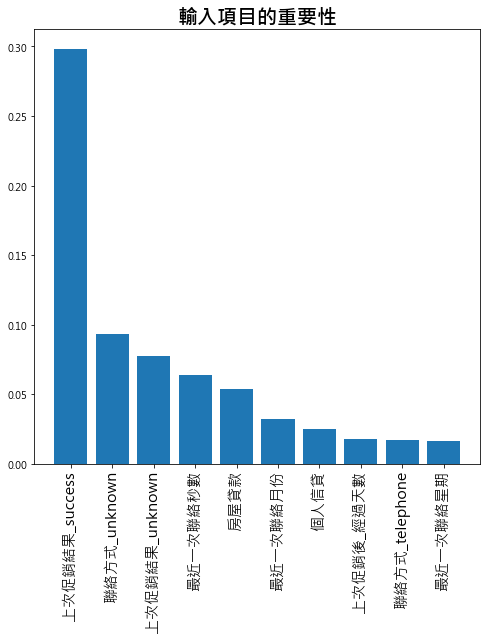

In [28]:
# 前10個重要特徵
importances=algorithm.feature_importances_
w=pd.Series(importances,index=df.drop(['是否購買定期存款'],axis=1).columns)
u=w.sort_values(ascending=False)
v=u[:10]

# 繪圖
plt.figure(figsize=(8,8))
plt.title('輸入項目的重要性',fontsize=20,fontweight='heavy')
plt.bar(range(len(v)),v)
plt.xticks(range(len(v)),v.index,rotation=90,fontsize=15)
plt.show()

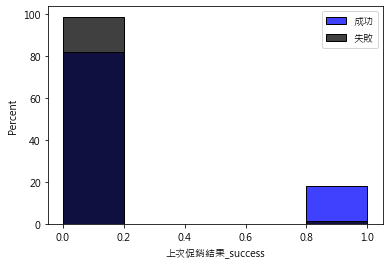

In [29]:
# 上次促銷結果_success看影響
X_test=pd.DataFrame(x_test,columns=df.drop(['是否購買定期存款'],axis=1).columns)
sns.histplot(X_test[y_test==1]['上次促銷結果_success'],bins=5,color='b',label='成功',stat='percent')
sns.histplot(X_test[y_test==0]['上次促銷結果_success'],bins=5,color='k',label='失敗',stat='percent')
plt.legend()
plt.show()

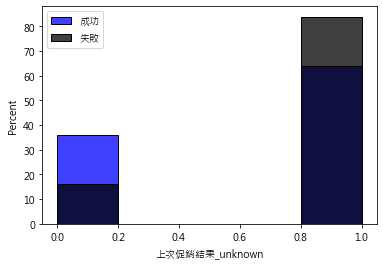

In [30]:
# 上次促銷結果_unknown  看影響
X_test=pd.DataFrame(x_test,columns=df.drop(['是否購買定期存款'],axis=1).columns)
sns.histplot(X_test[y_test==1]['上次促銷結果_unknown'],bins=5,color='b',label='成功',stat='percent')
sns.histplot(X_test[y_test==0]['上次促銷結果_unknown'],bins=5,color='k',label='失敗',stat='percent')
plt.legend()
plt.show()

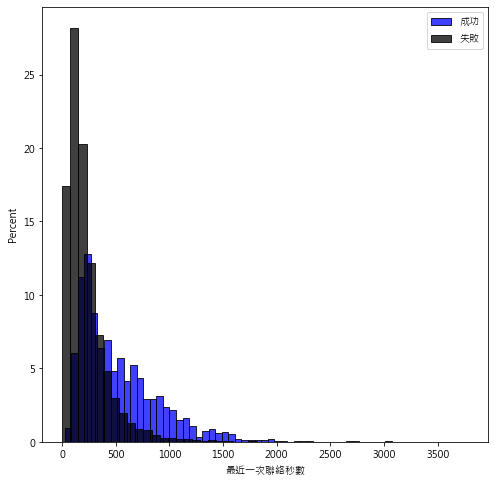

In [31]:
# 查看通話時間
X_test=pd.DataFrame(x_test,columns=df.drop(['是否購買定期存款'],axis=1).columns)
plt.figure(figsize=(8,8))
sns.histplot(X_test[y_test==1]['最近一次聯絡秒數'],bins=50,color='b',label='成功',stat='percent')
sns.histplot(X_test[y_test==0]['最近一次聯絡秒數'],bins=50,color='k',label='失敗',stat='percent')
plt.legend()
plt.show()

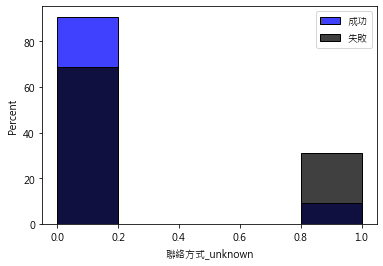

In [32]:
# 查看聯絡方式_unknown
X_test=pd.DataFrame(x_test,columns=df.drop(['是否購買定期存款'],axis=1).columns)
sns.histplot(X_test[y_test==1]['聯絡方式_unknown'],bins=5,color='b',label='成功',stat='percent')
sns.histplot(X_test[y_test==0]['聯絡方式_unknown'],bins=5,color='k',label='失敗',stat='percent')
plt.legend()
plt.show()

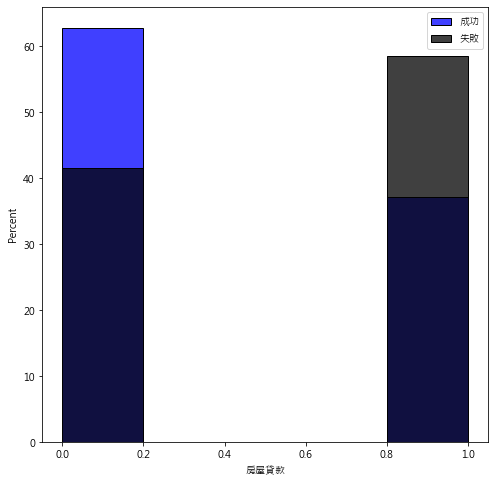

In [33]:
# 查看房屋貸款 
X_test=pd.DataFrame(x_test,columns=df.drop(['是否購買定期存款'],axis=1).columns)
plt.figure(figsize=(8,8))
sns.histplot(X_test[y_test==1]['房屋貸款'],bins=5,color='b',label='成功',stat='percent')
sns.histplot(X_test[y_test==0]['房屋貸款'],bins=5,color='k',label='失敗',stat='percent')
plt.legend()
plt.show()

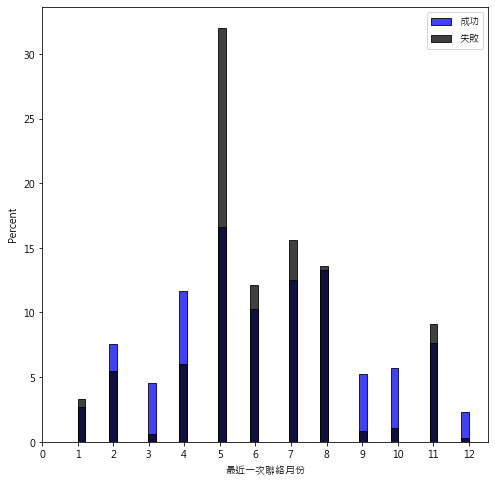

In [34]:
# 查看最近一次聯絡月份 
X_test=pd.DataFrame(x_test,columns=df.drop(['是否購買定期存款'],axis=1).columns)
plt.figure(figsize=(8,8))
sns.histplot(X_test[y_test==1]['最近一次聯絡月份'],bins=50,color='b',label='成功',stat='percent')
sns.histplot(X_test[y_test==0]['最近一次聯絡月份'],bins=50,color='k',label='失敗',stat='percent')
plt.xticks(list(range(0,13)))
plt.legend()
plt.show()

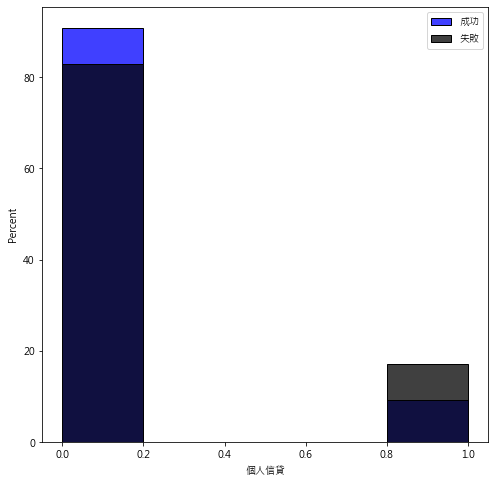

In [35]:
# 查看個人信貸
X_test=pd.DataFrame(x_test,columns=df.drop(['是否購買定期存款'],axis=1).columns)
plt.figure(figsize=(8,8))
sns.histplot(X_test[y_test==1]['個人信貸'],bins=5,color='b',label='成功',stat='percent')
sns.histplot(X_test[y_test==0]['個人信貸'],bins=5,color='k',label='失敗',stat='percent')
plt.legend()
plt.show()

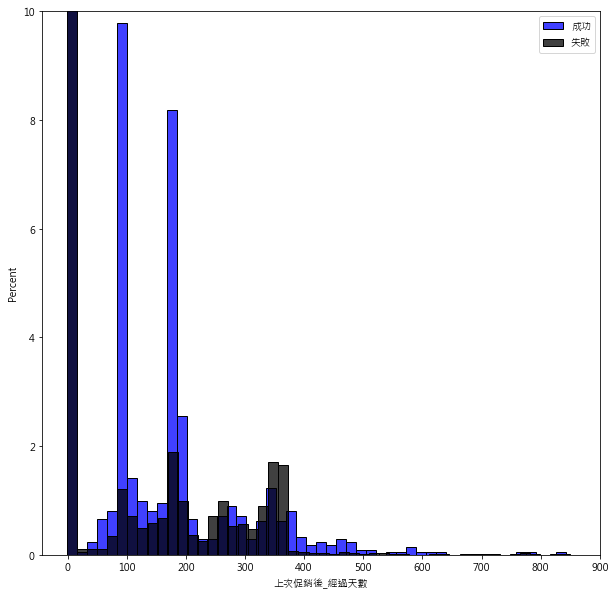

In [36]:
# 查看上次促銷後_經過天數
X_test=pd.DataFrame(x_test,columns=df.drop(['是否購買定期存款'],axis=1).columns)
plt.figure(figsize=(10,10))
sns.histplot(X_test[y_test==1]['上次促銷後_經過天數'],bins=50,color='b',label='成功',stat='percent')
sns.histplot(X_test[y_test==0]['上次促銷後_經過天數'],bins=50,color='k',label='失敗',stat='percent')
plt.ylim([0,10])
plt.xticks(list(range(0,1000,100)))
plt.legend()
plt.show()

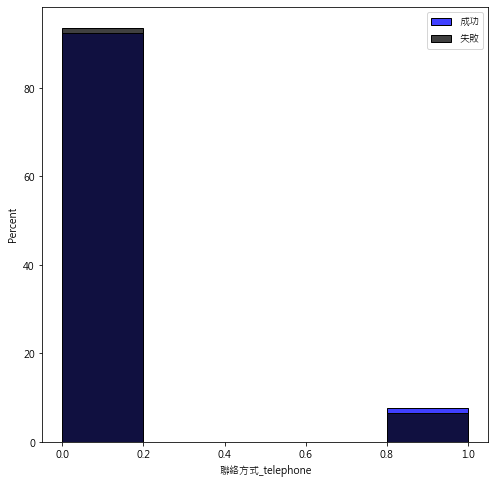

In [37]:
# 查看聯絡方式_telephone
X_test=pd.DataFrame(x_test,columns=df.drop(['是否購買定期存款'],axis=1).columns)
plt.figure(figsize=(8,8))
sns.histplot(X_test[y_test==1]['聯絡方式_telephone'],bins=5,color='b',label='成功',stat='percent')
sns.histplot(X_test[y_test==0]['聯絡方式_telephone'],bins=5,color='k',label='失敗',stat='percent')
plt.legend()
plt.show()

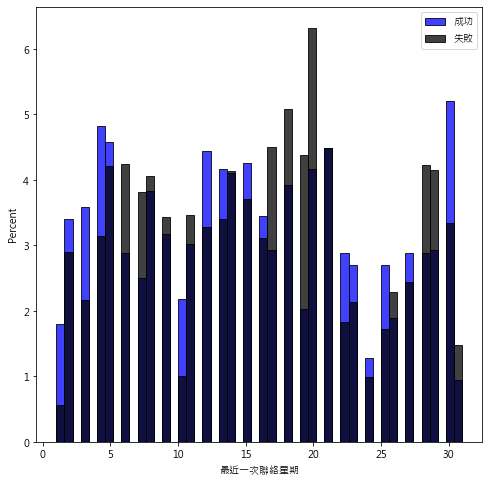

In [38]:
# 查看最近一次聯絡星期
X_test=pd.DataFrame(x_test,columns=df.drop(['是否購買定期存款'],axis=1).columns)
plt.figure(figsize=(8,8))
sns.histplot(X_test[y_test==1]['最近一次聯絡星期'],bins=50,color='b',label='成功',stat='percent')
sns.histplot(X_test[y_test==0]['最近一次聯絡星期'],bins=50,color='k',label='失敗',stat='percent')
plt.legend()
plt.show()

In [41]:
# 匯出成功且測試名單
# 因沒有會員資訊，以index假裝為客戶編號

y_sucess=X_test[y_pre==1]
df_sucess=pd.DataFrame({'客戶編號':y_sucess.index,
                        '年齡':y_sucess['年齡']}).reset_index(drop=True)

# 加入基本資訊
career=y_sucess.columns[(y_sucess.columns.str.contains('職業.*'))]
marriage=y_sucess.columns[(y_sucess.columns.str.contains('婚姻.*'))]
education=y_sucess.columns[(y_sucess.columns.str.contains('學歷.*'))]
poutcome=y_sucess.columns[(y_sucess.columns.str.contains('上次促銷結果.*'))]

message_dict={'職業':career,'婚姻':marriage,'學歷':education,'上次促銷結果':poutcome}

for name,lis in message_dict.items(): 
    df_lis=y_sucess[lis].stack().reset_index()
    df_name=(df_lis[df_lis[0]==1]).reset_index(drop=True).drop(['level_0',0],axis=1)
    df_sucess[name]=df_name
    
# 匯出Excel名單
import openpyxl
df_sucess.to_excel("./促銷客戶名單.xlsx",index=False) 

In [42]:
# 匯出模型
import joblib
joblib.dump(algorithm,'./sales_forecast_XGmodel')

['./sales_forecast_XGmodel']

In [49]:
# 測試
sale_model=joblib.load('sales_forecast_XGmodel')
result=sale_model.predict(x_test[30:31])
result

array([0])